In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
import re

Using TensorFlow backend.


In [10]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [11]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\runtimes_final_mantevo_miniFE.csv')

In [12]:
df.head()

,sys,sysname,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,...,l3_size,mem-size,mem-type,mem_clock,num-cpus,bus_speed,PS,executable,no_of_procs,runtime
0,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,100,mantevo_miniFE.x_100_1,1,13.12450
1,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,100,mantevo_miniFE.x_100_2,2,10.62630
2,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,100,mantevo_miniFE.x_100_3,3,9.38095
3,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,100,mantevo_miniFE.x_100_4,4,9.97341
4,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,100,mantevo_miniFE.x_100_5,5,10.86990


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 26 columns):
sys                      124 non-null object
sysname                  124 non-null object
arch                     124 non-null object
cpu-clock                124 non-null float64
isa                      124 non-null object
l1d_assoc                124 non-null int64
l1d_cache_lines          124 non-null int64
l1d_shared_by_threads    124 non-null int64
l1d_size                 124 non-null int64
l2_assoc                 124 non-null int64
l2_cache_lines           124 non-null int64
l2_shared_by_threads     124 non-null int64
l2_size                  124 non-null int64
l3_assoc                 124 non-null int64
l3_cache_lines           124 non-null int64
l3_shared_by_threads     124 non-null int64
l3_size                  124 non-null int64
mem-size                 124 non-null int64
mem-type                 124 non-null object
mem_clock                124 non-null int64
num-cpus

In [14]:
df.columns, len(df.columns)

(Index(['sys', 'sysname', 'arch', 'cpu-clock', 'isa', 'l1d_assoc',
        'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
        'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
        'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
        'mem-type', 'mem_clock', 'num-cpus', 'bus_speed', 'PS', 'executable',
        'no_of_procs', 'runtime'],
       dtype='object'), 26)

In [16]:
len(df)

124

In [17]:
import re
st = "qsort20000.dat"
temp = re.findall(r'\d+', st) 
res = list(map(int, temp)) 

# print result 
t = str(res[0])
int(t)

20000

In [18]:
def encode_qsort_PS_col(data):
    for i in range(len(data)):
        st = data[i]
        temp = re.findall(r'\d+', st) 
        res = list(map(int, temp)) 
        x = str(res[0])
        data[i] = int(x)

In [19]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [20]:
# encode_qsort_PS_col(encoded_data_frame['PS'])

In [21]:
encoded_data_frame.head()

,sys,sysname,arch,cpu-clock,isa_1,isa_2,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,...,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,bus_speed,PS,executable,no_of_procs,runtime
0,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,0,8,64,1,32,...,1,0,0,1600,4,4096.0,100,mantevo_miniFE.x_100_1,1,13.12450
1,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,0,8,64,1,32,...,1,0,0,1600,4,4096.0,100,mantevo_miniFE.x_100_2,2,10.62630
2,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,0,8,64,1,32,...,1,0,0,1600,4,4096.0,100,mantevo_miniFE.x_100_3,3,9.38095
3,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,0,8,64,1,32,...,1,0,0,1600,4,4096.0,100,mantevo_miniFE.x_100_4,4,9.97341
4,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,0,8,64,1,32,...,1,0,0,1600,4,4096.0,100,mantevo_miniFE.x_100_5,5,10.86990


In [22]:
encoded_data_frame.columns

Index(['sys', 'sysname', 'arch', 'cpu-clock', 'isa_1', 'isa_2', 'l1d_assoc',
       'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
       'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
       'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
       'mem-type_1', 'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus',
       'bus_speed', 'PS', 'executable', 'no_of_procs', 'runtime'],
      dtype='object')

In [23]:
total_data = encoded_data_frame.drop(columns = ['arch', 'sys', 'sysname', 'executable'])

In [24]:
total_data.columns

Index(['cpu-clock', 'isa_1', 'isa_2', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'bus_speed', 'PS',
       'no_of_procs', 'runtime'],
      dtype='object')

In [25]:
total_data = total_data.fillna(0)
temp = total_data
#.drop(columns = 'PS')

In [33]:
X_columns = total_data.drop(columns = ['runtime', 'PS']).columns
X = total_data.drop(columns = ['runtime', 'PS']).to_numpy()
Y = total_data['runtime'].to_numpy()

In [34]:
X_columns

Index(['cpu-clock', 'isa_1', 'isa_2', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'bus_speed',
       'no_of_procs'],
      dtype='object')

In [35]:
X.shape, Y.shape

((124, 23), (124,))

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((99, 23), (25, 23), (99,), (25,))

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

# Histogram Visualization of Dataset

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

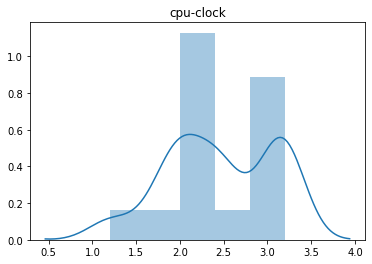

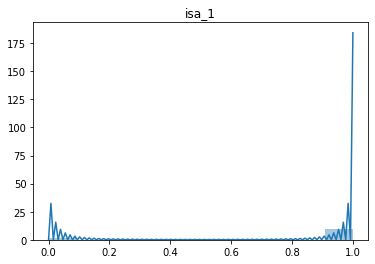

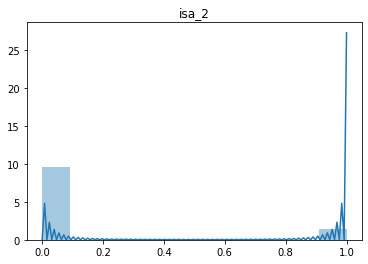

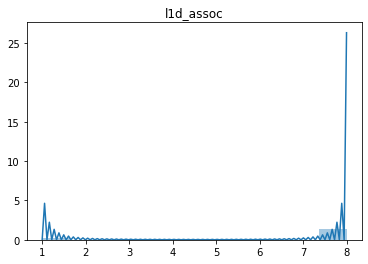

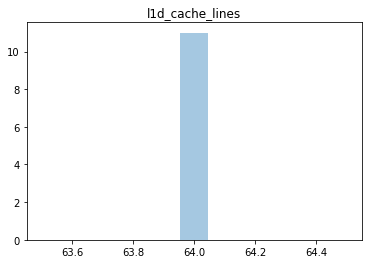

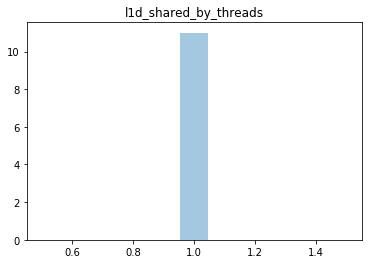

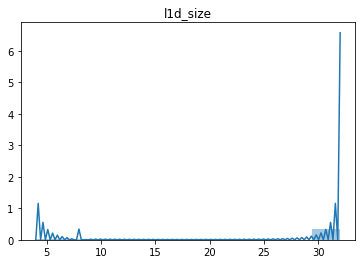

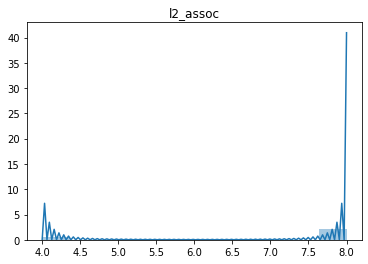

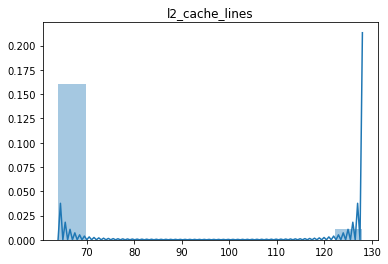

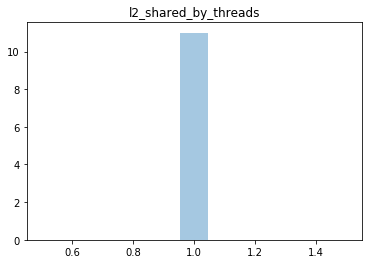

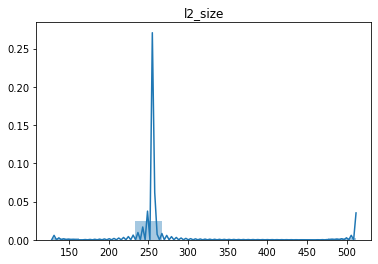

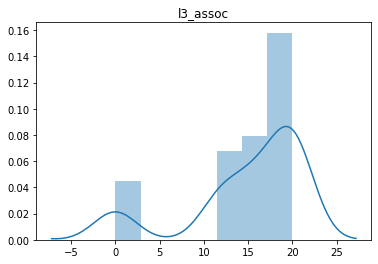

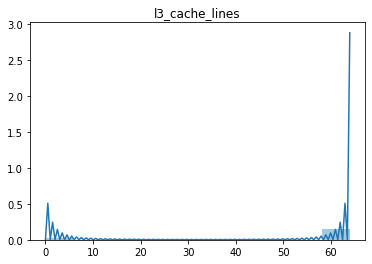

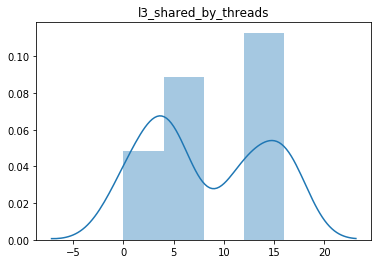

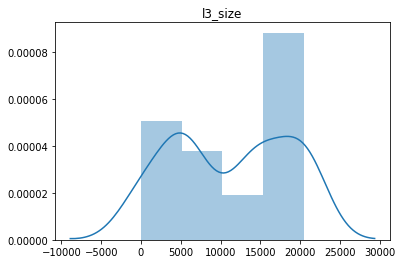

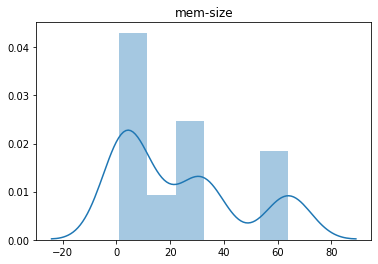

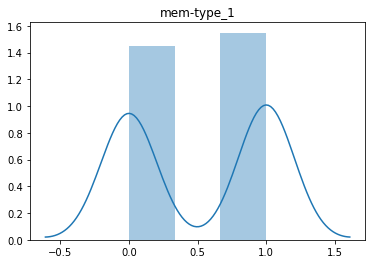

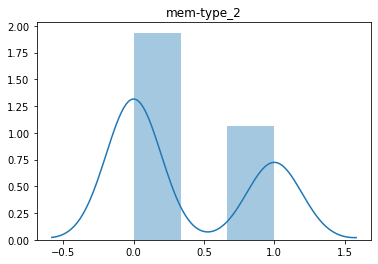

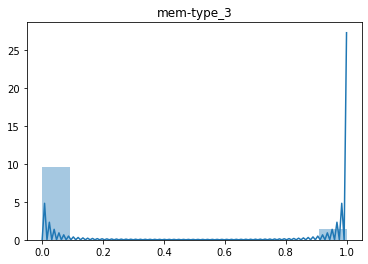

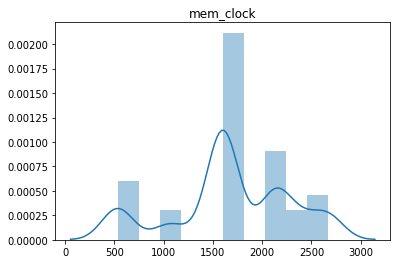

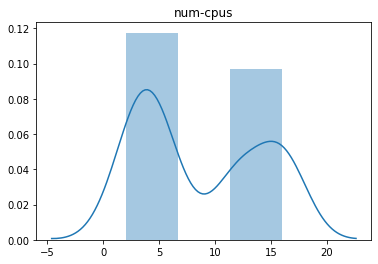

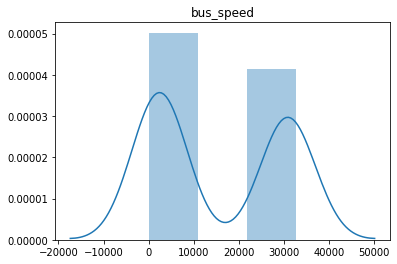

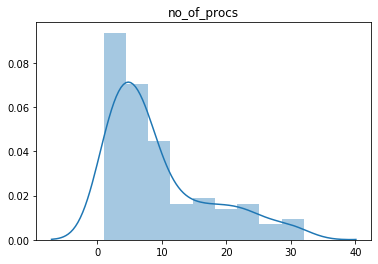

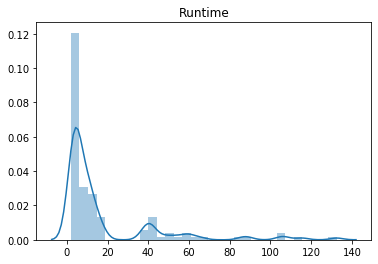

In [39]:
for i in range(X.shape[1]):
    plt.figure()
    plt.title(X_columns[i])
    sns.distplot(X[:,i]) # Also plots Gaussian KDE over data
plt.figure()
plt.title('Runtime')
sns.distplot(Y)

# Understanding Correlations

In [40]:
temp.head(100)

,cpu-clock,isa_1,isa_2,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,bus_speed,PS,no_of_procs,runtime
0,3.2,1,0,8,64,1,32,4,64,1,...,4,1,0,0,1600,4,4096.0,100,1,13.12450
1,3.2,1,0,8,64,1,32,4,64,1,...,4,1,0,0,1600,4,4096.0,100,2,10.62630
2,3.2,1,0,8,64,1,32,4,64,1,...,4,1,0,0,1600,4,4096.0,100,3,9.38095
3,3.2,1,0,8,64,1,32,4,64,1,...,4,1,0,0,1600,4,4096.0,100,4,9.97341
4,3.2,1,0,8,64,1,32,4,64,1,...,4,1,0,0,1600,4,4096.0,100,5,10.86990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.7,0,1,1,64,1,4,8,128,1,...,2,0,0,1,533,4,0.0,100,4,65.99760
96,1.7,0,1,1,64,1,4,8,128,1,...,2,0,0,1,533,4,0.0,100,5,115.55200
97,1.7,0,1,1,64,1,4,8,128,1,...,2,0,0,1,533,4,0.0,100,6,107.22600
98,1.7,0,1,1,64,1,4,8,128,1,...,2,0,0,1,533,4,0.0,100,7,89.15130


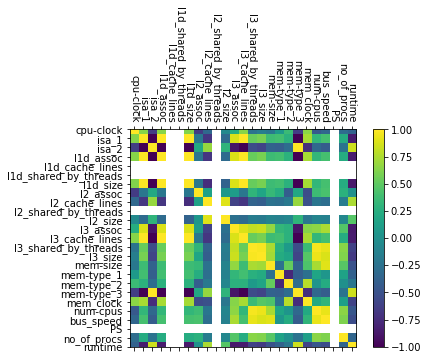

<Figure size 1440x1080 with 0 Axes>

In [44]:
train_data = temp
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,25,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
plt.figure(figsize=(20,15))
plt.show()

In [45]:
correlations

,cpu-clock,isa_1,isa_2,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,bus_speed,PS,no_of_procs,runtime
cpu-clock,1.000000,0.636309,-0.636309,0.636309,NaN,NaN,0.622024,-0.649707,-0.326146,NaN,...,-0.197657,0.076508,0.365920,-0.636309,0.653410,-0.437899,-0.337707,NaN,-0.284863,-0.371424
isa_1,0.636309,1.000000,-1.000000,1.000000,NaN,NaN,0.996620,-0.207870,-0.682288,NaN,...,0.371954,0.397523,0.285450,-1.000000,0.735268,0.324780,0.411638,NaN,0.237834,-0.844686
isa_2,-0.636309,-1.000000,1.000000,-1.000000,NaN,NaN,-0.996620,0.207870,0.682288,NaN,...,-0.371954,-0.397523,-0.285450,1.000000,-0.735268,-0.324780,-0.411638,NaN,-0.237834,0.844686
l1d_assoc,0.636309,1.000000,-1.000000,1.000000,NaN,NaN,0.996620,-0.207870,-0.682288,NaN,...,0.371954,0.397523,0.285450,-1.000000,0.735268,0.324780,0.411638,NaN,0.237834,-0.844686
l1d_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_size,0.622024,0.996620,-0.996620,0.996620,NaN,NaN,1.000000,-0.207167,-0.740038,NaN,...,0.370054,0.396180,0.284485,-0.996620,0.732783,0.323683,0.410247,NaN,0.237030,-0.860984
l2_assoc,-0.649707,-0.207870,0.207870,-0.207870,NaN,NaN,-0.207167,1.000000,0.141827,NaN,...,0.342039,0.249006,-0.405722,0.207870,-0.536614,0.370433,0.422691,NaN,0.274596,0.011437
l2_cache_lines,-0.326146,-0.682288,0.682288,-0.682288,NaN,NaN,-0.740038,0.141827,1.000000,NaN,...,-0.248059,-0.271225,-0.194759,0.682288,-0.501665,-0.221594,-0.280856,NaN,-0.162271,0.746777
l2_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.063, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.189, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.273, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.073, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.173, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.253, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.047, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.179, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.261, total=   0.0s
[CV] C

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.173, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.548, total=   0.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.873, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.631, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.612, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.910, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.761, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.7s finished


{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  38.478024616073256
R2 score = 0.8334980142073662
Mean Absolute Percentage Error is: 0.5415771493928674
Mean Absolute Error is: 4.039140885216763


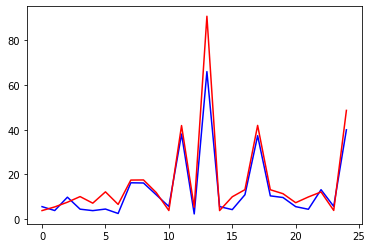

In [47]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# 10 fold cross validation for best SVR

KFold(n_splits=10, random_state=42, shuffle=True)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
MSE for 10 folds
 [0.9476187919193817, 45.03555077828517, 0.0887879801862625, 503.1011618793575, 375.44718144089614, 167.19399448139293, 87.49697538912348, 25.739500106680868, 79.35525323254987, 557.169276878555]

R2 scores for 10 folds
 [0.9893360327033016, 0.8661030461198584, 0.9991031587149936, 0.4533681016437504, -0.07250130797311116, 0.8198703224769872, 0.9280619267056114, 0.9164184901114962, 0.8815291317731907, 0.544915164319552]

MAPE for 10 folds
 [0.0856186224525741, 0.10231156393157288, 0.04870503871478073, 0.17298615893126523, 0.22769028998217936, 0.07758785049673861, 0.07273508785260542, 0.09603495788781387, 0.

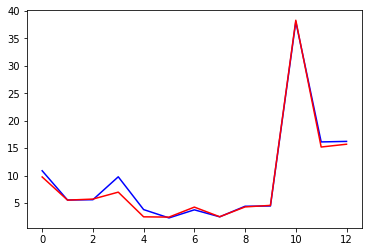

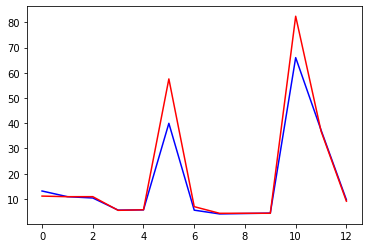

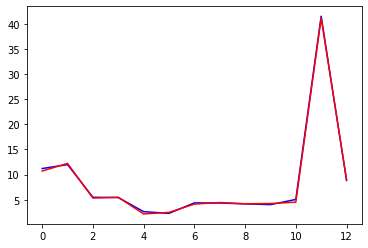

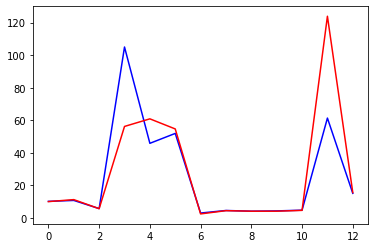

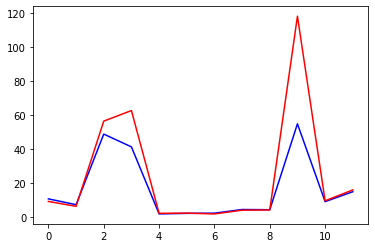

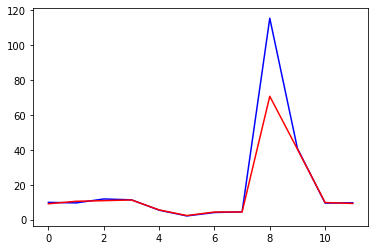

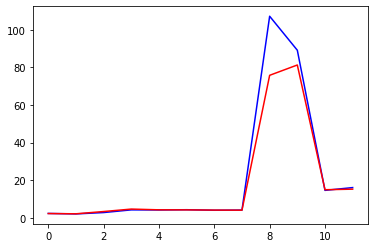

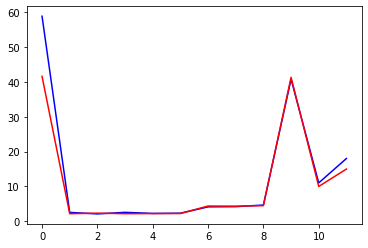

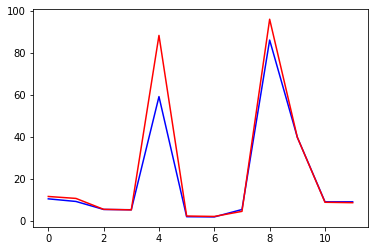

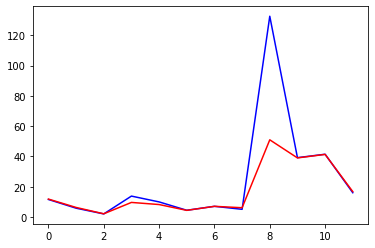

In [48]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_svr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_svr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# SVR Analysis

## 0. Our best fit line is the line hyperplane that has maximum number of points. (SVR)
## 1. For linear kernel - Data should be linearly seperable - How to know this? - IF not working well, 
## 2. data must be linearly inseperable? 
## 3. C = 1000,-> Less Regularization was needed
## gamma = 0.1 -> Kernel Coefficient ,  rest default
## 4. SVM performs worse on highly skewed datasets (Can be seen by histograms)
## 5. Logistic regression works well on skewed datasets. (But this is a regression problem and logistic regression works great with classificaton problem)
## 6. How to prove whether given dataset is skewed and not linearly separable?
## 7. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.802, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-0.331, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-7.255, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.802, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-0.330, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-7.264, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.808, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-0.328, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-0.176, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished


{'alpha': 0.01, 'normalize_y': True}
GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  116.54399294032125
R2 score = 0.4956912042553169

Mean Absolute Percentage Error = 0.6565892879814874
Mean Absolute Error is: 5.759151436292163


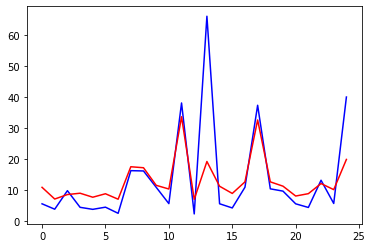

In [49]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
MSE for 10 folds
 [1.5231898318662178, 71.55557562320486, 14.116390372008876, 410.63431134458494, 168.54619978509916, 85.49535357509166, 27.058203751862532, 53.40141681922726, 109.9920137724756, 737.3233985416969]

R2 scores for 10 folds
 [0.982858880921109, 0.7872553251040297, 0.8574113111445273, 0.5538356295938587, 0.5185314242347754, 0.9078899303951308, 0.977753344774956, 0.8265944936988946, 0.8357909673420919, 0.3977688440602307]

MAPE for 10 folds
 [0.22997594004732422, 0.4458898020959629, 0.37792384178058874, 0.340870200192691, 0.39970035194180026, 0.18246746321841667, 0.5968331965695732, 1.2294056019868769, 0.509314

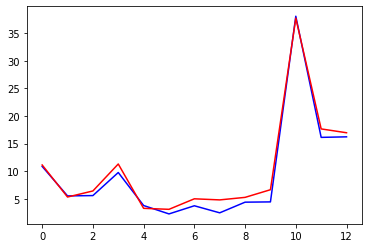

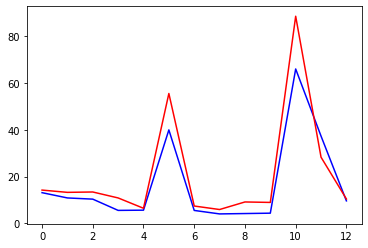

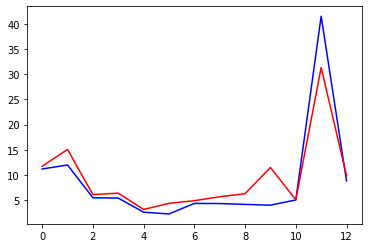

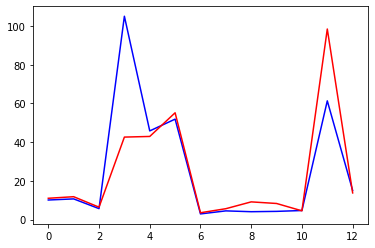

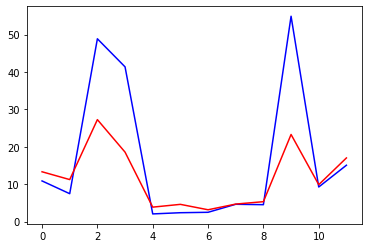

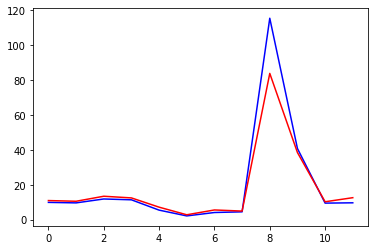

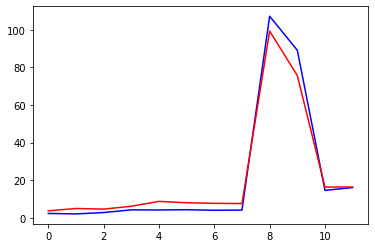

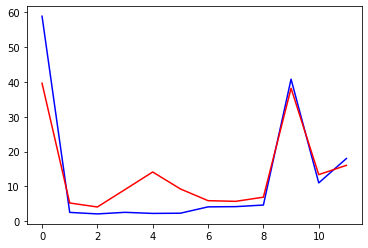

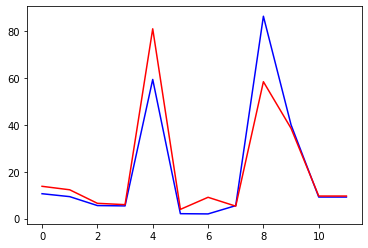

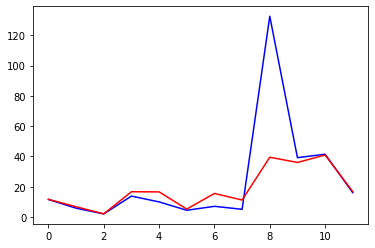

In [50]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_best = GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state = 42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    gpr_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = gpr_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.681, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.709, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.646, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.758, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.842, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.757, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.738, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.912, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimato

[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=20, score=0.718, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.555, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.881, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.721, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.551, total=   0.2s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.882, total=   0.2s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, 

[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=50, score=0.791, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.605, total=   0.6s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.729, total=   0.6s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.794, total=   0.6s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.677, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.355, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5,

[CV]  criterion=mse, loss=lad, max_depth=15, n_estimators=100, score=0.839, total=   1.7s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.677, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.379, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.247, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.827, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.561, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad

[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=10 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=10, score=0.604, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.762, total=   0.4s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.684, total=   0.5s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.722, total=   0.5s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.677, total=   1.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.751, total=   1.2s
[CV] criterion=mse, loss=huber, ma

[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.626, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.666, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.302, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.749, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.811, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=100 .....
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=100, score=0.545, total=   0.4s
[CV] criterion=

[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=20, score=0.818, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.546, total=   0.4s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.849, total=   0.5s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.917, total=   0.4s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.693, total=   1.0s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.855, total=   1.0s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  cr

[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.784, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.895, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.737, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.785, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.901, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.740, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=5, n_estimators=10

[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.881, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.721, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.551, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.882, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.720, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10 
[CV]  criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10, score=0.669, t

[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.749, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.774, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.883, total=   0.6s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.890, total=   0.6s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.786, total=   0.5s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10, score=0.677, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estima

[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.844, total=   0.6s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.778, total=   0.7s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.736, total=   1.9s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.851, total=   1.6s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.864, total=   1.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10, score=0.752, total=   0.1s
[CV] criterion=friedman_mse, loss=hu

[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.721, total=   1.2s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.713, total=   1.1s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.633, total=   2.4s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.726, total=   2.2s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.716, total=   1.9s
[CV] criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10, score=0.750, total=   0.3s
[CV] criterion=friedman_mse, loss=huber, ma

[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.302, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.749, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.811, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.545, total=   0.5s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.754, total=   0.5s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.854, total=   0.5s
[CV] criteri

[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.729, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.818, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.568, total=   0.4s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.837, total=   0.5s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.917, total=   0.5s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100, score=0.708, total=   1.3s
[CV] 

[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.630, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.853, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.814, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.702, total=   0.4s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.891, total=   0.4s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.852, total=   0.4s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=100 ...........
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimat

[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.881, total=   0.4s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.721, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.548, total=   0.7s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.882, total=   0.8s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.720, total=   0.7s
[CV] criterion=mae, loss=ls, max_depth=None, n_estimators=10 .........
[CV]  criterion=mae, loss=ls, max_depth=None, n_estimators=10, score=0.665, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=No

[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.905, total=   1.5s
[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.920, total=   1.5s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.808, total=   0.2s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.461, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.407, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=20 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=20, score=0.823, total=   0.3s
[CV] criterion=mae, loss=lad, max_depth=7, n

[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.701, total=   0.0s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.656, total=   0.0s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.713, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.800, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.824, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=50 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=50, score=0.722, total=   0.2s
[CV] criterion=mae, loss=huber, ma

[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.815, total=   0.3s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.874, total=   0.3s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.713, total=   0.3s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.775, total=   0.8s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.919, total=   0.7s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.738, total=   0.6s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=100 .......
[CV]  criterion=mae, loss=hu

[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=20, score=0.626, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.734, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.766, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.771, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.807, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.810, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterio

[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.883, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.785, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.857, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.888, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.785, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=None, n_estimators=10 ...
[CV]  criterion=mae, loss=quantile, max_depth=None, n_estimators=10, score=0.038, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  6.8min finished


{'criterion': 'friedman_mse', 'loss': 'huber', 'max_depth': 3, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  82.48612325066046
R2 score = 0.6430663097025564

Mean Absolute Percentage Error = 0.2870722094948629
Mean Absolute Error is: 4.155527374449639


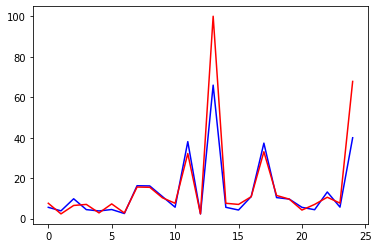

In [51]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

KFold(n_splits=10, random_state=42, shuffle=True)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(111, 23) (13, 23) (111,) (13,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
(112, 23) (12, 23) (112,) (12,)
MSE for 10 folds
 [0.6100449877267219, 75.70399004535656, 0.3953652555230445, 547.4181609615761, 18.881822852296224, 113.59336025599201, 2.166605572279241, 52.10968593469796, 16.82591298358156, 235.49005544213946]

R2 scores for 10 folds
 [0.993134897857549, 0.7749215122615234, 0.9960064427294513, 0.40521658228078283, 0.94606224069046, 0.8776180004841955, 0.9982186649336677, 0.8307890125221467, 0.9748802953973057, 0.8076563844552671]

MAPE for 10 folds
 [0.08063402376964064, 0.11857907074867793, 0.042201109553266385, 0.1710406147647228, 0.1047626965449499, 0.0628561464797939, 0.0380175660030558, 0.20351997891320983, 0.0761

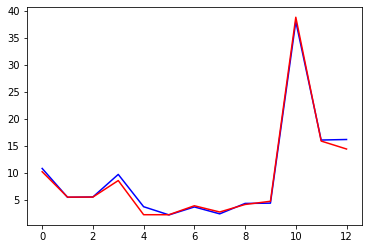

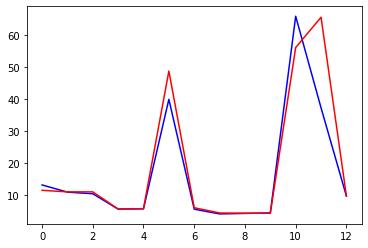

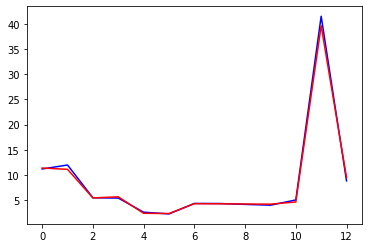

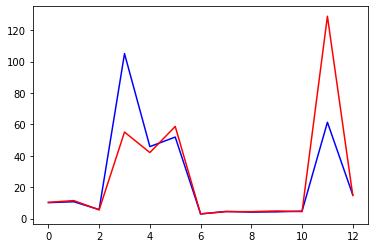

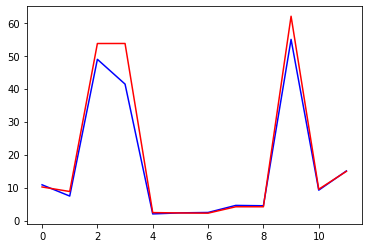

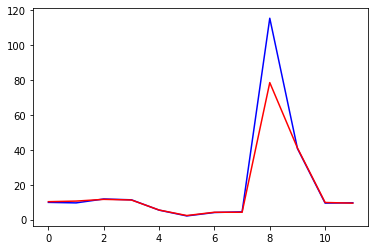

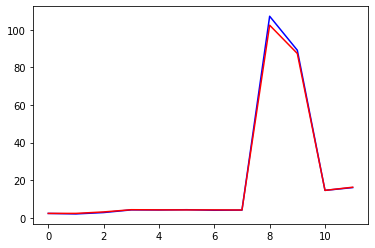

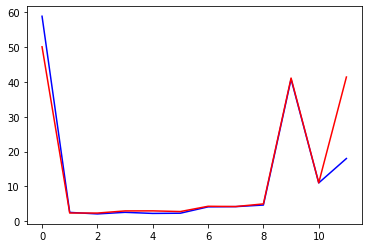

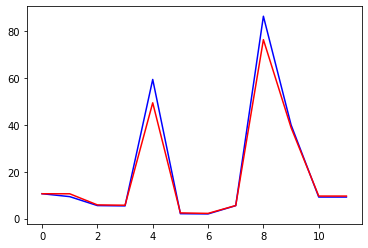

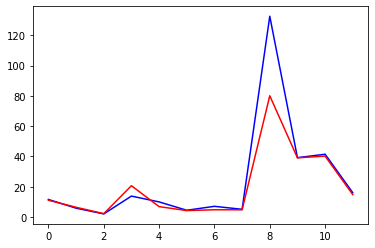

In [52]:
from sklearn import ensemble
reg_best = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[20:26:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.647, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[20:26:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.580, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[20:26:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.528, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[20:26:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.764, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[20:26:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.813, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators

[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.767, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[20:26:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.814, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[20:26:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.771, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[20:26:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimator

[20:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=0.771, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[20:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.854, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[20:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.927, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[20:26:20] WARNING: C:/Jenkins/workspace/xgboo

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.911, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[20:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.934, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[20:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.983, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[20:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimator

[20:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.987, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[20:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.931, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[20:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.962, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[20:26:21] WARNING: C:/Jenkins/workspace/xgboos

[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[20:26:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.962, total=   0.0s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[20:26:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.987, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_estimators=10 ................
[20:26:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10, score=0.820, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_esti

[20:26:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=0.496, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[20:26:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-0.162, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[20:26:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-0.217, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[20:26:23] WARNING: C:/Jenkins/workspace/xg

[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.163, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[20:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.217, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[20:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.324, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=20 ................
[20:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_es

[20:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-0.324, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[20:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=0.003, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[20:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.061, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[20:26:24] WARNING: C:/Jenkins/workspace/

[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.376, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[20:26:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.362, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[20:26:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.468, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=50 ...............
[20:26:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, 

[20:26:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-0.468, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[20:26:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-0.293, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[20:26:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-0.305, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[20:26:26] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.293, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[20:26:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.305, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[20:26:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.411, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[20:26:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=

[20:26:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-0.498, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[20:26:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-0.405, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[20:26:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-0.381, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[20:26:27] WARNING: C:/Jenkins/work

[20:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-0.406, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[20:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-0.381, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[20:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-0.488, total=   0.0s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=10 .............
[20:26:28] WARNING: C:/Jenkins/wor

[20:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-0.381, total=   0.0s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[20:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-0.488, total=   0.0s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    9.7s finished


[20:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  263.3448560195746
R2 score = -0.13954502376450462

Mean Absolute Percentage Error = 1.6891695169129535
Mean Absolute Error is: 10.539770329602051


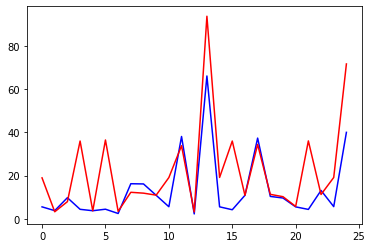

In [53]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

KFold(n_splits=10, random_state=42, shuffle=True)
(111, 23) (13, 23) (111,) (13,)
[20:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(111, 23) (13, 23) (111,) (13,)
[20:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(111, 23) (13, 23) (111,) (13,)
[20:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(111, 23) (13, 23) (111,) (13,)
[20:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(112, 23) (12, 23) (112,) (12,)
[20:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated 

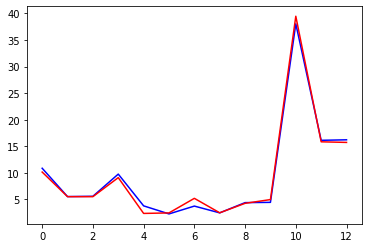

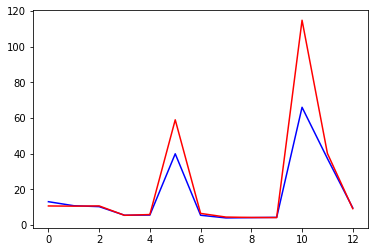

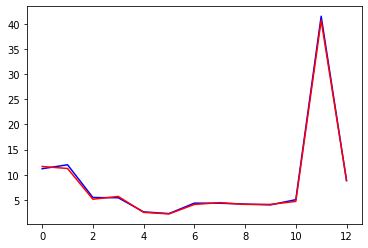

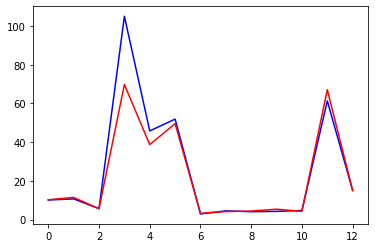

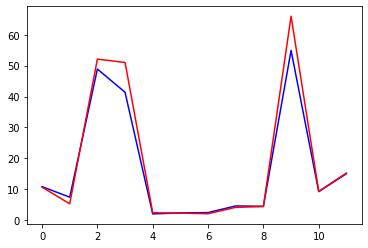

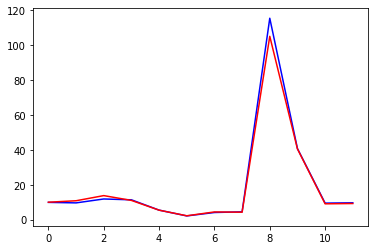

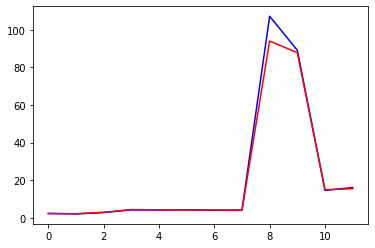

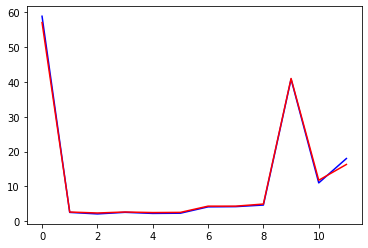

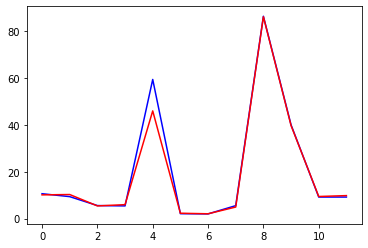

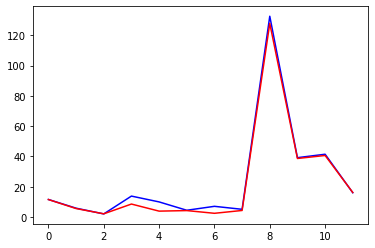

In [54]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg_best = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# 11. DNN_1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               12288     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(111, 23) (13, 23) (111,) (13,)
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 441.9916 - mae: 441.9916
Epoch 2/100
 - 0s - loss: 238.5047 - mae: 238.5047
Epoch 3/100
 - 0s - loss: 242.3948 - mae: 242.3947
Epoch 4/100
 - 0s - loss: 164.1267 - mae: 164.1267
Epoch 5/100
 - 0s - loss: 121.3593 - mae: 121.3593
Epoch 6/100
 - 0s - loss: 106.4616 - mae: 106.4616
Epoch 7/100


Epoch 41/100
 - 0s - loss: 29.6606 - mae: 29.6606
Epoch 42/100
 - 0s - loss: 42.9288 - mae: 42.9288
Epoch 43/100
 - 0s - loss: 57.9826 - mae: 57.9826
Epoch 44/100
 - 0s - loss: 92.8289 - mae: 92.8289
Epoch 45/100
 - 0s - loss: 95.5729 - mae: 95.5729
Epoch 46/100
 - 0s - loss: 48.1238 - mae: 48.1238
Epoch 47/100
 - 0s - loss: 21.5688 - mae: 21.5688
Epoch 48/100
 - 0s - loss: 71.5478 - mae: 71.5478
Epoch 49/100
 - 0s - loss: 71.6672 - mae: 71.6672
Epoch 50/100
 - 0s - loss: 35.0745 - mae: 35.0745
Epoch 51/100
 - 0s - loss: 84.3256 - mae: 84.3257
Epoch 52/100
 - 0s - loss: 62.7099 - mae: 62.7099
Epoch 53/100
 - 0s - loss: 45.9283 - mae: 45.9282
Epoch 54/100
 - 0s - loss: 21.3281 - mae: 21.3281
Epoch 55/100
 - 0s - loss: 53.7975 - mae: 53.7975
Epoch 56/100
 - 0s - loss: 45.7997 - mae: 45.7997
Epoch 57/100
 - 0s - loss: 106.8257 - mae: 106.8257
Epoch 58/100
 - 0s - loss: 75.7100 - mae: 75.7100
Epoch 59/100
 - 0s - loss: 70.3414 - mae: 70.3414
Epoch 60/100
 - 0s - loss: 65.7515 - mae: 65.751

(111, 23) (13, 23) (111,) (13,)
Epoch 1/100
 - 0s - loss: 143.3057 - mae: 143.3057
Epoch 2/100
 - 0s - loss: 153.3291 - mae: 153.3291
Epoch 3/100
 - 0s - loss: 158.0859 - mae: 158.0859
Epoch 4/100
 - 0s - loss: 102.5483 - mae: 102.5483
Epoch 5/100
 - 0s - loss: 99.7589 - mae: 99.7589
Epoch 6/100
 - 0s - loss: 41.9959 - mae: 41.9959
Epoch 7/100
 - 0s - loss: 46.8147 - mae: 46.8147
Epoch 8/100
 - 0s - loss: 41.0123 - mae: 41.0123
Epoch 9/100
 - 0s - loss: 29.8414 - mae: 29.8414
Epoch 10/100
 - 0s - loss: 18.4293 - mae: 18.4293
Epoch 11/100
 - 0s - loss: 47.8306 - mae: 47.8306
Epoch 12/100
 - 0s - loss: 148.2204 - mae: 148.2204
Epoch 13/100
 - 0s - loss: 51.1693 - mae: 51.1693
Epoch 14/100
 - 0s - loss: 39.9701 - mae: 39.9701
Epoch 15/100
 - 0s - loss: 138.0136 - mae: 138.0136
Epoch 16/100
 - 0s - loss: 70.5000 - mae: 70.5000
Epoch 17/100
 - 0s - loss: 59.5392 - mae: 59.5392
Epoch 18/100
 - 0s - loss: 68.2220 - mae: 68.2220
Epoch 19/100
 - 0s - loss: 47.8396 - mae: 47.8396
Epoch 20/100
 -

Epoch 63/100
 - 0s - loss: 14.1124 - mae: 14.1124
Epoch 64/100
 - 0s - loss: 28.7249 - mae: 28.7249
Epoch 65/100
 - 0s - loss: 18.7995 - mae: 18.7995
Epoch 66/100
 - 0s - loss: 33.6169 - mae: 33.6169
Epoch 67/100
 - 0s - loss: 30.3014 - mae: 30.3014
Epoch 68/100
 - 0s - loss: 64.7319 - mae: 64.7319
Epoch 69/100
 - 0s - loss: 31.7913 - mae: 31.7913
Epoch 70/100
 - 0s - loss: 29.5806 - mae: 29.5806
Epoch 71/100
 - 0s - loss: 19.5667 - mae: 19.5667
Epoch 72/100
 - 0s - loss: 32.0042 - mae: 32.0042
Epoch 73/100
 - 0s - loss: 44.4921 - mae: 44.4921
Epoch 74/100
 - 0s - loss: 124.5756 - mae: 124.5756
Epoch 75/100
 - 0s - loss: 67.1780 - mae: 67.1780
Epoch 76/100
 - 0s - loss: 41.4872 - mae: 41.4872
Epoch 77/100
 - 0s - loss: 31.0759 - mae: 31.0759
Epoch 78/100
 - 0s - loss: 39.8971 - mae: 39.8971
Epoch 79/100
 - 0s - loss: 20.8583 - mae: 20.8583
Epoch 80/100
 - 0s - loss: 21.6481 - mae: 21.6481
Epoch 81/100
 - 0s - loss: 16.6362 - mae: 16.6362
Epoch 82/100
 - 0s - loss: 17.0201 - mae: 17.020

Epoch 24/100
 - 0s - loss: 26.3295 - mae: 26.3295
Epoch 25/100
 - 0s - loss: 16.5885 - mae: 16.5885
Epoch 26/100
 - 0s - loss: 22.0391 - mae: 22.0391
Epoch 27/100
 - 0s - loss: 29.5466 - mae: 29.5466
Epoch 28/100
 - 0s - loss: 38.7501 - mae: 38.7501
Epoch 29/100
 - 0s - loss: 49.7412 - mae: 49.7412
Epoch 30/100
 - 0s - loss: 18.2176 - mae: 18.2176
Epoch 31/100
 - 0s - loss: 17.1346 - mae: 17.1346
Epoch 32/100
 - 0s - loss: 25.0851 - mae: 25.0851
Epoch 33/100
 - 0s - loss: 31.6033 - mae: 31.6033
Epoch 34/100
 - 0s - loss: 11.6007 - mae: 11.6007
Epoch 35/100
 - 0s - loss: 17.3942 - mae: 17.3942
Epoch 36/100
 - 0s - loss: 22.8188 - mae: 22.8188
Epoch 37/100
 - 0s - loss: 60.1777 - mae: 60.1777
Epoch 38/100
 - 0s - loss: 18.7775 - mae: 18.7775
Epoch 39/100
 - 0s - loss: 13.9922 - mae: 13.9922
Epoch 40/100
 - 0s - loss: 37.0159 - mae: 37.0159
Epoch 41/100
 - 0s - loss: 49.0679 - mae: 49.0679
Epoch 42/100
 - 0s - loss: 30.6101 - mae: 30.6101
Epoch 43/100
 - 0s - loss: 13.5100 - mae: 13.5100


Epoch 87/100
 - 0s - loss: 33.2079 - mae: 33.2079
Epoch 88/100
 - 0s - loss: 21.2766 - mae: 21.2766
Epoch 89/100
 - 0s - loss: 19.3130 - mae: 19.3130
Epoch 90/100
 - 0s - loss: 14.8251 - mae: 14.8251
Epoch 91/100
 - 0s - loss: 12.9797 - mae: 12.9797
Epoch 92/100
 - 0s - loss: 19.6366 - mae: 19.6366
Epoch 93/100
 - 0s - loss: 12.3278 - mae: 12.3278
Epoch 94/100
 - 0s - loss: 13.2395 - mae: 13.2395
Epoch 95/100
 - 0s - loss: 14.4123 - mae: 14.4123
Epoch 96/100
 - 0s - loss: 13.7839 - mae: 13.7839
Epoch 97/100
 - 0s - loss: 16.5386 - mae: 16.5386
Epoch 98/100
 - 0s - loss: 20.3246 - mae: 20.3246
Epoch 99/100
 - 0s - loss: 20.7940 - mae: 20.7940
Epoch 100/100
 - 0s - loss: 16.3713 - mae: 16.3713
*******************Fold number************************:  9
(112, 23) (12, 23) (112,) (12,)
Epoch 1/100
 - 0s - loss: 26.6747 - mae: 26.6747
Epoch 2/100
 - 0s - loss: 23.0945 - mae: 23.0945
Epoch 3/100
 - 0s - loss: 24.2302 - mae: 24.2302
Epoch 4/100
 - 0s - loss: 42.9633 - mae: 42.9633
Epoch 5/100


Epoch 48/100
 - 0s - loss: 15.1666 - mae: 15.1666
Epoch 49/100
 - 0s - loss: 13.2297 - mae: 13.2297
Epoch 50/100
 - 0s - loss: 9.4473 - mae: 9.4473
Epoch 51/100
 - 0s - loss: 16.5150 - mae: 16.5150
Epoch 52/100
 - 0s - loss: 15.1254 - mae: 15.1254
Epoch 53/100
 - 0s - loss: 41.6792 - mae: 41.6792
Epoch 54/100
 - 0s - loss: 29.4333 - mae: 29.4333
Epoch 55/100
 - 0s - loss: 33.1690 - mae: 33.1690
Epoch 56/100
 - 0s - loss: 28.9458 - mae: 28.9458
Epoch 57/100
 - 0s - loss: 14.8358 - mae: 14.8358
Epoch 58/100
 - 0s - loss: 19.0704 - mae: 19.0704
Epoch 59/100
 - 0s - loss: 12.1860 - mae: 12.1860
Epoch 60/100
 - 0s - loss: 16.4476 - mae: 16.4476
Epoch 61/100
 - 0s - loss: 9.0154 - mae: 9.0154
Epoch 62/100
 - 0s - loss: 18.6448 - mae: 18.6448
Epoch 63/100
 - 0s - loss: 35.2898 - mae: 35.2898
Epoch 64/100
 - 0s - loss: 19.7879 - mae: 19.7879
Epoch 65/100
 - 0s - loss: 34.7730 - mae: 34.7730
Epoch 66/100
 - 0s - loss: 20.9461 - mae: 20.9461
Epoch 67/100
 - 0s - loss: 13.5576 - mae: 13.5576
Epoc

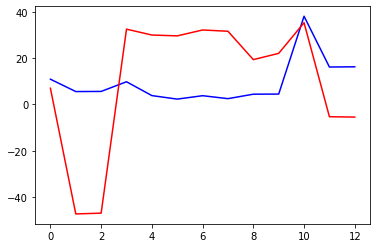

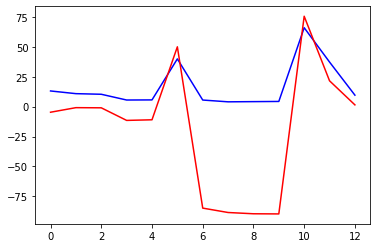

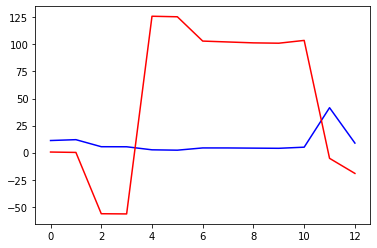

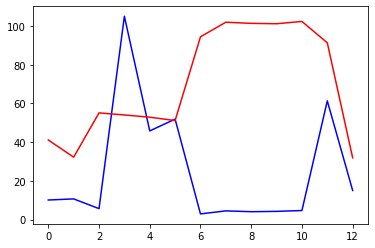

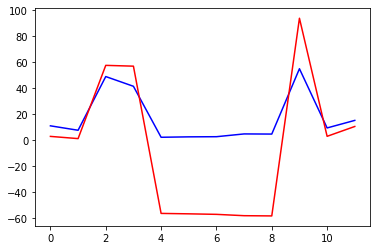

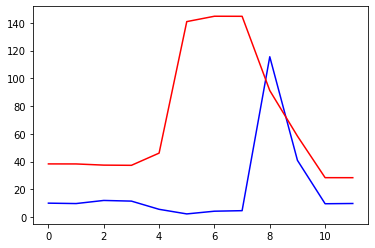

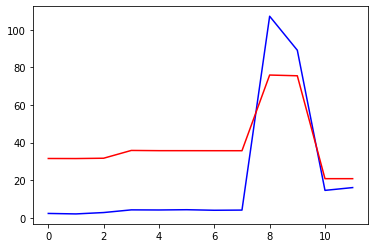

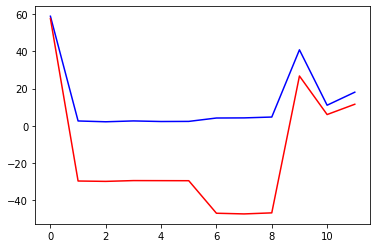

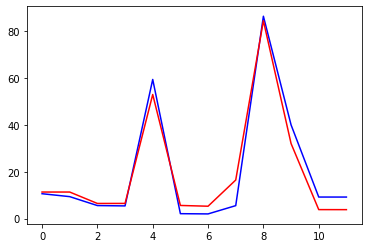

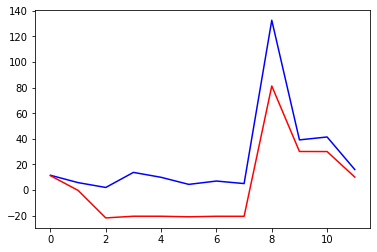

In [56]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=23, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in cv.split(X):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               12288     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 538,113
Trainable params: 538,113
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(111, 23) (13, 23) (111,) (13,)
Epoch 1/100
 - 0s - loss: 1230.4832 - mae: 1230.4833
Epoch 2/100
 - 0s - loss: 272.8624 - mae: 272.8

Epoch 48/100
 - 0s - loss: 3.5699 - mae: 3.5699
Epoch 49/100
 - 0s - loss: 5.0631 - mae: 5.0631
Epoch 50/100
 - 0s - loss: 5.3461 - mae: 5.3461
Epoch 51/100
 - 0s - loss: 6.3621 - mae: 6.3621
Epoch 52/100
 - 0s - loss: 4.8625 - mae: 4.8625
Epoch 53/100
 - 0s - loss: 4.3214 - mae: 4.3214
Epoch 54/100
 - 0s - loss: 3.8106 - mae: 3.8106
Epoch 55/100
 - 0s - loss: 3.6453 - mae: 3.6453
Epoch 56/100
 - 0s - loss: 4.7127 - mae: 4.7127
Epoch 57/100
 - 0s - loss: 4.1832 - mae: 4.1832
Epoch 58/100
 - 0s - loss: 4.1837 - mae: 4.1837
Epoch 59/100
 - 0s - loss: 4.3757 - mae: 4.3757
Epoch 60/100
 - 0s - loss: 3.9143 - mae: 3.9143
Epoch 61/100
 - 0s - loss: 3.8509 - mae: 3.8509
Epoch 62/100
 - 0s - loss: 3.6803 - mae: 3.6803
Epoch 63/100
 - 0s - loss: 3.6208 - mae: 3.6208
Epoch 64/100
 - 0s - loss: 3.5503 - mae: 3.5503
Epoch 65/100
 - 0s - loss: 4.3270 - mae: 4.3270
Epoch 66/100
 - 0s - loss: 3.8654 - mae: 3.8654
Epoch 67/100
 - 0s - loss: 5.2347 - mae: 5.2347
Epoch 68/100
 - 0s - loss: 3.7819 - mae:

Epoch 15/100
 - 0s - loss: 4.7182 - mae: 4.7182
Epoch 16/100
 - 0s - loss: 4.9483 - mae: 4.9483
Epoch 17/100
 - 0s - loss: 3.0932 - mae: 3.0932
Epoch 18/100
 - 0s - loss: 3.2058 - mae: 3.2058
Epoch 19/100
 - 0s - loss: 3.1195 - mae: 3.1195
Epoch 20/100
 - 0s - loss: 3.5710 - mae: 3.5710
Epoch 21/100
 - 0s - loss: 3.6216 - mae: 3.6216
Epoch 22/100
 - 0s - loss: 2.9275 - mae: 2.9275
Epoch 23/100
 - 0s - loss: 3.2080 - mae: 3.2080
Epoch 24/100
 - 0s - loss: 3.7181 - mae: 3.7181
Epoch 25/100
 - 0s - loss: 3.6731 - mae: 3.6731
Epoch 26/100
 - 0s - loss: 3.6154 - mae: 3.6154
Epoch 27/100
 - 0s - loss: 3.2374 - mae: 3.2374
Epoch 28/100
 - 0s - loss: 3.1970 - mae: 3.1970
Epoch 29/100
 - 0s - loss: 4.7603 - mae: 4.7603
Epoch 30/100
 - 0s - loss: 5.0059 - mae: 5.0059
Epoch 31/100
 - 0s - loss: 5.8941 - mae: 5.8941
Epoch 32/100
 - 0s - loss: 4.6325 - mae: 4.6325
Epoch 33/100
 - 0s - loss: 4.6587 - mae: 4.6587
Epoch 34/100
 - 0s - loss: 3.5227 - mae: 3.5227
Epoch 35/100
 - 0s - loss: 3.1746 - mae:

Epoch 84/100
 - 0s - loss: 3.1786 - mae: 3.1786
Epoch 85/100
 - 0s - loss: 3.2139 - mae: 3.2139
Epoch 86/100
 - 0s - loss: 3.1493 - mae: 3.1493
Epoch 87/100
 - 0s - loss: 3.5037 - mae: 3.5037
Epoch 88/100
 - 0s - loss: 3.2317 - mae: 3.2317
Epoch 89/100
 - 0s - loss: 3.6694 - mae: 3.6694
Epoch 90/100
 - 0s - loss: 3.6168 - mae: 3.6168
Epoch 91/100
 - 0s - loss: 3.2244 - mae: 3.2244
Epoch 92/100
 - 0s - loss: 4.2824 - mae: 4.2824
Epoch 93/100
 - 0s - loss: 3.4978 - mae: 3.4978
Epoch 94/100
 - 0s - loss: 3.1950 - mae: 3.1950
Epoch 95/100
 - 0s - loss: 3.4513 - mae: 3.4513
Epoch 96/100
 - 0s - loss: 3.2766 - mae: 3.2766
Epoch 97/100
 - 0s - loss: 4.5450 - mae: 4.5450
Epoch 98/100
 - 0s - loss: 3.7533 - mae: 3.7533
Epoch 99/100
 - 0s - loss: 3.7349 - mae: 3.7349
Epoch 100/100
 - 0s - loss: 3.4538 - mae: 3.4538
*******************Fold number************************:  6
(112, 23) (12, 23) (112,) (12,)
Epoch 1/100
 - 0s - loss: 4.4122 - mae: 4.4122
Epoch 2/100
 - 0s - loss: 4.0867 - mae: 4.086

Epoch 51/100
 - 0s - loss: 3.4156 - mae: 3.4156
Epoch 52/100
 - 0s - loss: 3.5936 - mae: 3.5936
Epoch 53/100
 - 0s - loss: 3.8045 - mae: 3.8045
Epoch 54/100
 - 0s - loss: 3.8085 - mae: 3.8085
Epoch 55/100
 - 0s - loss: 3.5590 - mae: 3.5590
Epoch 56/100
 - 0s - loss: 3.6388 - mae: 3.6388
Epoch 57/100
 - 0s - loss: 3.4985 - mae: 3.4985
Epoch 58/100
 - 0s - loss: 3.7683 - mae: 3.7683
Epoch 59/100
 - 0s - loss: 3.7262 - mae: 3.7262
Epoch 60/100
 - 0s - loss: 4.8348 - mae: 4.8348
Epoch 61/100
 - 0s - loss: 4.2642 - mae: 4.2642
Epoch 62/100
 - 0s - loss: 3.5881 - mae: 3.5881
Epoch 63/100
 - 0s - loss: 3.8350 - mae: 3.8350
Epoch 64/100
 - 0s - loss: 4.1689 - mae: 4.1689
Epoch 65/100
 - 0s - loss: 4.4221 - mae: 4.4221
Epoch 66/100
 - 0s - loss: 3.7118 - mae: 3.7118
Epoch 67/100
 - 0s - loss: 3.4740 - mae: 3.4740
Epoch 68/100
 - 0s - loss: 3.5776 - mae: 3.5776
Epoch 69/100
 - 0s - loss: 3.4323 - mae: 3.4323
Epoch 70/100
 - 0s - loss: 3.5023 - mae: 3.5023
Epoch 71/100
 - 0s - loss: 3.5722 - mae:

Epoch 18/100
 - 0s - loss: 4.0637 - mae: 4.0637
Epoch 19/100
 - 0s - loss: 3.7429 - mae: 3.7429
Epoch 20/100
 - 0s - loss: 3.9743 - mae: 3.9743
Epoch 21/100
 - 0s - loss: 3.7820 - mae: 3.7820
Epoch 22/100
 - 0s - loss: 3.9566 - mae: 3.9566
Epoch 23/100
 - 0s - loss: 4.1171 - mae: 4.1171
Epoch 24/100
 - 0s - loss: 3.9242 - mae: 3.9242
Epoch 25/100
 - 0s - loss: 4.0444 - mae: 4.0444
Epoch 26/100
 - 0s - loss: 3.8776 - mae: 3.8776
Epoch 27/100
 - 0s - loss: 3.9052 - mae: 3.9052
Epoch 28/100
 - 0s - loss: 4.0554 - mae: 4.0554
Epoch 29/100
 - 0s - loss: 4.0365 - mae: 4.0365
Epoch 30/100
 - 0s - loss: 3.8128 - mae: 3.8128
Epoch 31/100
 - 0s - loss: 3.7518 - mae: 3.7518
Epoch 32/100
 - 0s - loss: 3.6266 - mae: 3.6266
Epoch 33/100
 - 0s - loss: 3.7357 - mae: 3.7357
Epoch 34/100
 - 0s - loss: 3.6267 - mae: 3.6267
Epoch 35/100
 - 0s - loss: 3.9646 - mae: 3.9646
Epoch 36/100
 - 0s - loss: 3.7921 - mae: 3.7921
Epoch 37/100
 - 0s - loss: 3.4686 - mae: 3.4686
Epoch 38/100
 - 0s - loss: 3.8767 - mae:

Epoch 87/100
 - 0s - loss: 4.2447 - mae: 4.2447
Epoch 88/100
 - 0s - loss: 3.9511 - mae: 3.9511
Epoch 89/100
 - 0s - loss: 3.8110 - mae: 3.8110
Epoch 90/100
 - 0s - loss: 3.3929 - mae: 3.3929
Epoch 91/100
 - 0s - loss: 3.8843 - mae: 3.8843
Epoch 92/100
 - 0s - loss: 3.3932 - mae: 3.3932
Epoch 93/100
 - 0s - loss: 3.5626 - mae: 3.5626
Epoch 94/100
 - 0s - loss: 3.2883 - mae: 3.2883
Epoch 95/100
 - 0s - loss: 3.1699 - mae: 3.1699
Epoch 96/100
 - 0s - loss: 3.1964 - mae: 3.1964
Epoch 97/100
 - 0s - loss: 3.1177 - mae: 3.1177
Epoch 98/100
 - 0s - loss: 3.1136 - mae: 3.1136
Epoch 99/100
 - 0s - loss: 3.0722 - mae: 3.0722
Epoch 100/100
 - 0s - loss: 3.3390 - mae: 3.3390
MSE for 10 folds
 [74.88994580272326, 76.49902192885408, 6.824295564625417, 307.06929743214283, 197.98829577611068, 100.41658367496028, 140.83571862829857, 5.330455491913203, 23.59330389750517, 179.1612232321156]

R2 scores for 10 folds
 [0.1572307981839789, 0.7725577719364193, 0.9310682595706878, 0.6663615874882375, 0.434427

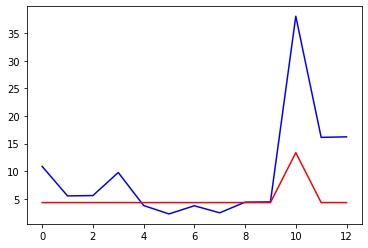

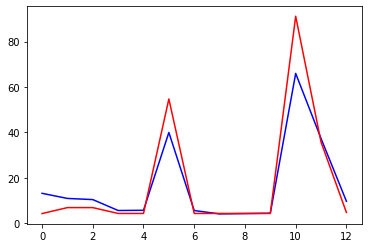

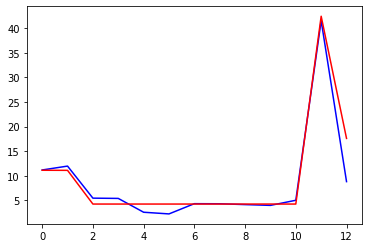

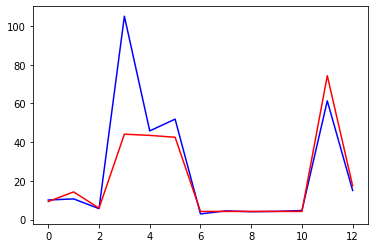

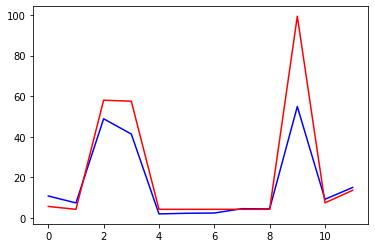

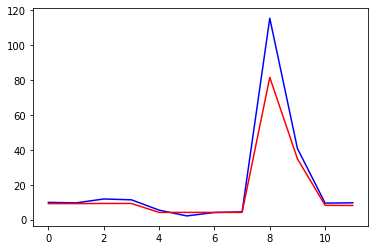

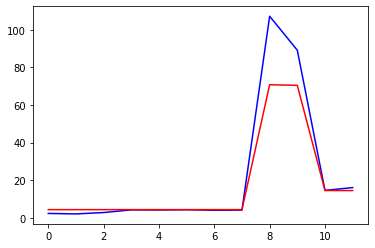

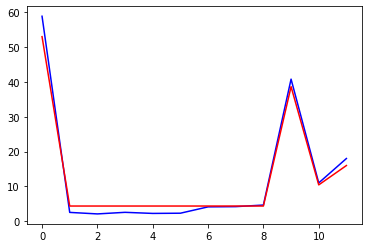

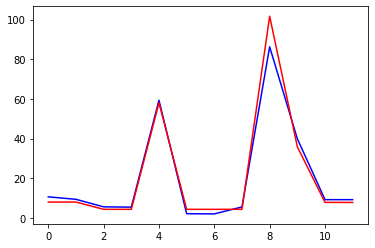

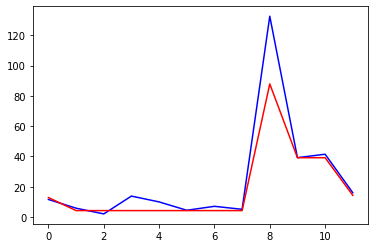

In [57]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=23, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1 
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_3

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               6144      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 23,705
Trainable params: 23,705
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(1

Epoch 44/100
 - 0s - loss: 8.7299 - mae: 8.7299
Epoch 45/100
 - 0s - loss: 8.6557 - mae: 8.6557
Epoch 46/100
 - 0s - loss: 8.6845 - mae: 8.6845
Epoch 47/100
 - 0s - loss: 8.9497 - mae: 8.9497
Epoch 48/100
 - 0s - loss: 8.8637 - mae: 8.8637
Epoch 49/100
 - 0s - loss: 8.6026 - mae: 8.6026
Epoch 50/100
 - 0s - loss: 8.6903 - mae: 8.6903
Epoch 51/100
 - 0s - loss: 8.6183 - mae: 8.6183
Epoch 52/100
 - 0s - loss: 8.6352 - mae: 8.6352
Epoch 53/100
 - 0s - loss: 8.6038 - mae: 8.6038
Epoch 54/100
 - 0s - loss: 8.5989 - mae: 8.5989
Epoch 55/100
 - 0s - loss: 8.5639 - mae: 8.5639
Epoch 56/100
 - 0s - loss: 8.5674 - mae: 8.5674
Epoch 57/100
 - 0s - loss: 8.6086 - mae: 8.6086
Epoch 58/100
 - 0s - loss: 8.6131 - mae: 8.6131
Epoch 59/100
 - 0s - loss: 8.5722 - mae: 8.5722
Epoch 60/100
 - 0s - loss: 8.9381 - mae: 8.9381
Epoch 61/100
 - 0s - loss: 8.6443 - mae: 8.6443
Epoch 62/100
 - 0s - loss: 8.6968 - mae: 8.6968
Epoch 63/100
 - 0s - loss: 8.5294 - mae: 8.5294
Epoch 64/100
 - 0s - loss: 8.6053 - mae:

Epoch 11/100
 - 0s - loss: 7.5561 - mae: 7.5561
Epoch 12/100
 - 0s - loss: 7.5367 - mae: 7.5367
Epoch 13/100
 - 0s - loss: 7.5177 - mae: 7.5177
Epoch 14/100
 - 0s - loss: 7.5224 - mae: 7.5224
Epoch 15/100
 - 0s - loss: 7.4771 - mae: 7.4771
Epoch 16/100
 - 0s - loss: 7.4951 - mae: 7.4951
Epoch 17/100
 - 0s - loss: 7.7939 - mae: 7.7939
Epoch 18/100
 - 0s - loss: 23.7990 - mae: 23.7990
Epoch 19/100
 - 0s - loss: 8.1528 - mae: 8.1528
Epoch 20/100
 - 0s - loss: 7.5502 - mae: 7.5502
Epoch 21/100
 - 0s - loss: 7.6542 - mae: 7.6542
Epoch 22/100
 - 0s - loss: 7.5788 - mae: 7.5788
Epoch 23/100
 - 0s - loss: 7.4717 - mae: 7.4717
Epoch 24/100
 - 0s - loss: 7.5049 - mae: 7.5049
Epoch 25/100
 - 0s - loss: 7.4350 - mae: 7.4350
Epoch 26/100
 - 0s - loss: 7.4406 - mae: 7.4406
Epoch 27/100
 - 0s - loss: 7.4300 - mae: 7.4300
Epoch 28/100
 - 0s - loss: 7.6582 - mae: 7.6582
Epoch 29/100
 - 0s - loss: 7.6019 - mae: 7.6019
Epoch 30/100
 - 0s - loss: 7.4785 - mae: 7.4785
Epoch 31/100
 - 0s - loss: 7.3988 - ma

Epoch 80/100
 - 0s - loss: 7.2529 - mae: 7.2529
Epoch 81/100
 - 0s - loss: 7.2192 - mae: 7.2192
Epoch 82/100
 - 0s - loss: 7.1955 - mae: 7.1955
Epoch 83/100
 - 0s - loss: 7.2065 - mae: 7.2065
Epoch 84/100
 - 0s - loss: 7.2970 - mae: 7.2970
Epoch 85/100
 - 0s - loss: 7.1378 - mae: 7.1378
Epoch 86/100
 - 0s - loss: 7.2010 - mae: 7.2010
Epoch 87/100
 - 0s - loss: 7.1961 - mae: 7.1961
Epoch 88/100
 - 0s - loss: 7.2016 - mae: 7.2016
Epoch 89/100
 - 0s - loss: 7.1545 - mae: 7.1545
Epoch 90/100
 - 0s - loss: 7.1665 - mae: 7.1665
Epoch 91/100
 - 0s - loss: 7.2096 - mae: 7.2096
Epoch 92/100
 - 0s - loss: 7.2085 - mae: 7.2085
Epoch 93/100
 - 0s - loss: 7.1984 - mae: 7.1984
Epoch 94/100
 - 0s - loss: 7.1973 - mae: 7.1973
Epoch 95/100
 - 0s - loss: 7.2410 - mae: 7.2410
Epoch 96/100
 - 0s - loss: 7.2279 - mae: 7.2279
Epoch 97/100
 - 0s - loss: 7.2167 - mae: 7.2167
Epoch 98/100
 - 0s - loss: 7.2182 - mae: 7.2182
Epoch 99/100
 - 0s - loss: 7.2050 - mae: 7.2050
Epoch 100/100
 - 0s - loss: 7.1663 - mae

Epoch 47/100
 - 0s - loss: 7.3585 - mae: 7.3585
Epoch 48/100
 - 0s - loss: 7.3802 - mae: 7.3802
Epoch 49/100
 - 0s - loss: 7.3078 - mae: 7.3078
Epoch 50/100
 - 0s - loss: 7.3553 - mae: 7.3553
Epoch 51/100
 - 0s - loss: 7.3337 - mae: 7.3337
Epoch 52/100
 - 0s - loss: 7.4415 - mae: 7.4415
Epoch 53/100
 - 0s - loss: 7.3520 - mae: 7.3520
Epoch 54/100
 - 0s - loss: 7.3299 - mae: 7.3299
Epoch 55/100
 - 0s - loss: 7.3528 - mae: 7.3528
Epoch 56/100
 - 0s - loss: 7.5213 - mae: 7.5213
Epoch 57/100
 - 0s - loss: 7.4192 - mae: 7.4192
Epoch 58/100
 - 0s - loss: 7.3526 - mae: 7.3526
Epoch 59/100
 - 0s - loss: 7.3224 - mae: 7.3224
Epoch 60/100
 - 0s - loss: 7.2937 - mae: 7.2937
Epoch 61/100
 - 0s - loss: 7.3110 - mae: 7.3110
Epoch 62/100
 - 0s - loss: 7.3041 - mae: 7.3041
Epoch 63/100
 - 0s - loss: 7.2952 - mae: 7.2952
Epoch 64/100
 - 0s - loss: 7.3289 - mae: 7.3289
Epoch 65/100
 - 0s - loss: 7.3674 - mae: 7.3674
Epoch 66/100
 - 0s - loss: 7.3438 - mae: 7.3438
Epoch 67/100
 - 0s - loss: 7.3364 - mae:

Epoch 14/100
 - 0s - loss: 7.2916 - mae: 7.2916
Epoch 15/100
 - 0s - loss: 7.3029 - mae: 7.3029
Epoch 16/100
 - 0s - loss: 7.2662 - mae: 7.2662
Epoch 17/100
 - 0s - loss: 7.2547 - mae: 7.2547
Epoch 18/100
 - 0s - loss: 7.2293 - mae: 7.2293
Epoch 19/100
 - 0s - loss: 7.3719 - mae: 7.3719
Epoch 20/100
 - 0s - loss: 7.3541 - mae: 7.3541
Epoch 21/100
 - 0s - loss: 7.3350 - mae: 7.3350
Epoch 22/100
 - 0s - loss: 7.1667 - mae: 7.1667
Epoch 23/100
 - 0s - loss: 7.2161 - mae: 7.2161
Epoch 24/100
 - 0s - loss: 7.1752 - mae: 7.1752
Epoch 25/100
 - 0s - loss: 7.2643 - mae: 7.2643
Epoch 26/100
 - 0s - loss: 7.1782 - mae: 7.1782
Epoch 27/100
 - 0s - loss: 7.1840 - mae: 7.1840
Epoch 28/100
 - 0s - loss: 7.2704 - mae: 7.2704
Epoch 29/100
 - 0s - loss: 7.2149 - mae: 7.2149
Epoch 30/100
 - 0s - loss: 7.1771 - mae: 7.1771
Epoch 31/100
 - 0s - loss: 7.2507 - mae: 7.2507
Epoch 32/100
 - 0s - loss: 7.2262 - mae: 7.2262
Epoch 33/100
 - 0s - loss: 7.1847 - mae: 7.1847
Epoch 34/100
 - 0s - loss: 7.3244 - mae:

Epoch 83/100
 - 0s - loss: 6.4205 - mae: 6.4205
Epoch 84/100
 - 0s - loss: 6.5023 - mae: 6.5023
Epoch 85/100
 - 0s - loss: 6.5655 - mae: 6.5655
Epoch 86/100
 - 0s - loss: 6.4234 - mae: 6.4234
Epoch 87/100
 - 0s - loss: 6.6182 - mae: 6.6182
Epoch 88/100
 - 0s - loss: 6.3868 - mae: 6.3868
Epoch 89/100
 - 0s - loss: 6.9259 - mae: 6.9259
Epoch 90/100
 - 0s - loss: 6.8058 - mae: 6.8058
Epoch 91/100
 - 0s - loss: 6.6556 - mae: 6.6556
Epoch 92/100
 - 0s - loss: 6.4423 - mae: 6.4423
Epoch 93/100
 - 0s - loss: 6.6210 - mae: 6.6210
Epoch 94/100
 - 0s - loss: 6.4705 - mae: 6.4705
Epoch 95/100
 - 0s - loss: 6.4678 - mae: 6.4678
Epoch 96/100
 - 0s - loss: 6.4357 - mae: 6.4357
Epoch 97/100
 - 0s - loss: 6.6713 - mae: 6.6712
Epoch 98/100
 - 0s - loss: 6.5389 - mae: 6.5389
Epoch 99/100
 - 0s - loss: 6.5807 - mae: 6.5807
Epoch 100/100
 - 0s - loss: 6.4435 - mae: 6.4435
MSE for 10 folds
 [158.20639789787614, 185.63139983731043, 127.8727675270304, 366.90377753610846, 117.95528379709073, 192.0189610805607

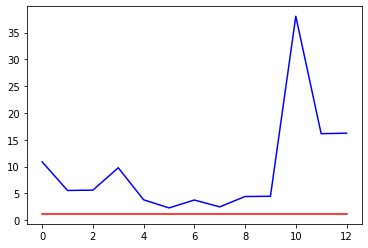

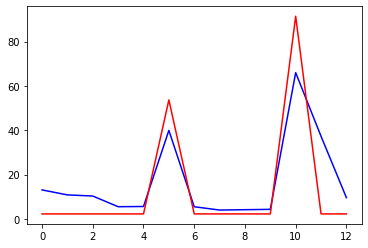

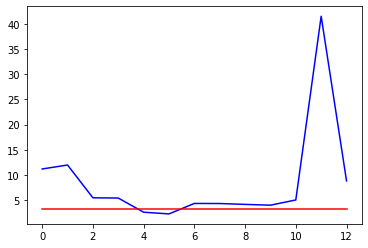

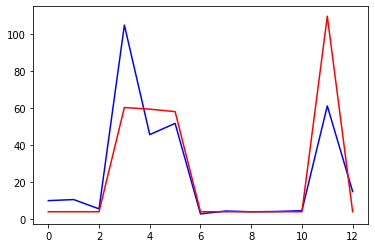

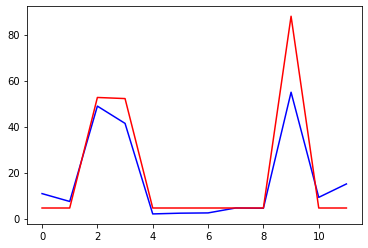

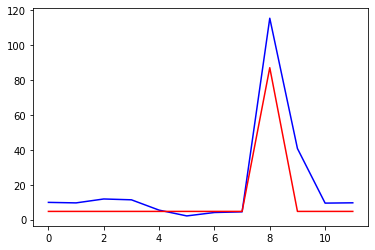

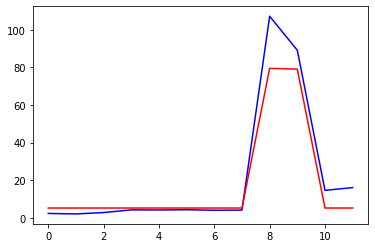

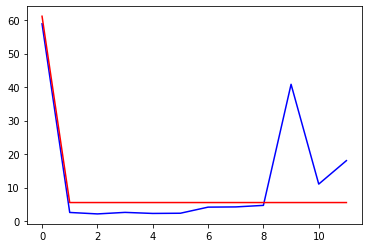

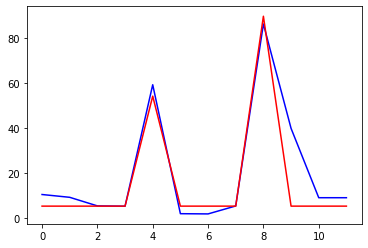

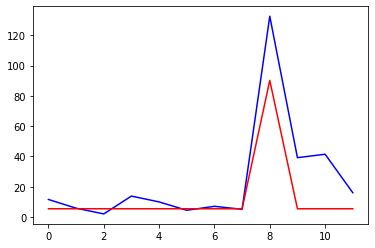

In [58]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=23, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

# DNN_4

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               12288     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 82,365
Trainable params: 82,365
Non-trainable params: 0
__________________________________________________

Epoch 43/100
 - 0s - loss: 4.8690 - mae: 4.8690
Epoch 44/100
 - 0s - loss: 5.1694 - mae: 5.1694
Epoch 45/100
 - 0s - loss: 4.9745 - mae: 4.9745
Epoch 46/100
 - 0s - loss: 4.5992 - mae: 4.5992
Epoch 47/100
 - 0s - loss: 4.2425 - mae: 4.2425
Epoch 48/100
 - 0s - loss: 3.9748 - mae: 3.9748
Epoch 49/100
 - 0s - loss: 4.1094 - mae: 4.1094
Epoch 50/100
 - 0s - loss: 4.5409 - mae: 4.5409
Epoch 51/100
 - 0s - loss: 3.9031 - mae: 3.9031
Epoch 52/100
 - 0s - loss: 4.5294 - mae: 4.5294
Epoch 53/100
 - 0s - loss: 4.4095 - mae: 4.4095
Epoch 54/100
 - 0s - loss: 4.1299 - mae: 4.1299
Epoch 55/100
 - 0s - loss: 3.8516 - mae: 3.8516
Epoch 56/100
 - 0s - loss: 3.9597 - mae: 3.9597
Epoch 57/100
 - 0s - loss: 4.5318 - mae: 4.5318
Epoch 58/100
 - 0s - loss: 4.9331 - mae: 4.9331
Epoch 59/100
 - 0s - loss: 4.7516 - mae: 4.7516
Epoch 60/100
 - 0s - loss: 4.1814 - mae: 4.1814
Epoch 61/100
 - 0s - loss: 3.9732 - mae: 3.9732
Epoch 62/100
 - 0s - loss: 4.5668 - mae: 4.5668
Epoch 63/100
 - 0s - loss: 4.5013 - mae:

Epoch 10/100
 - 0s - loss: 3.1236 - mae: 3.1236
Epoch 11/100
 - 0s - loss: 3.2764 - mae: 3.2764
Epoch 12/100
 - 0s - loss: 2.8129 - mae: 2.8129
Epoch 13/100
 - 0s - loss: 4.1349 - mae: 4.1349
Epoch 14/100
 - 0s - loss: 4.0183 - mae: 4.0183
Epoch 15/100
 - 0s - loss: 3.3219 - mae: 3.3219
Epoch 16/100
 - 0s - loss: 3.2435 - mae: 3.2435
Epoch 17/100
 - 0s - loss: 4.2233 - mae: 4.2233
Epoch 18/100
 - 0s - loss: 3.9390 - mae: 3.9390
Epoch 19/100
 - 0s - loss: 3.2052 - mae: 3.2052
Epoch 20/100
 - 0s - loss: 3.6497 - mae: 3.6497
Epoch 21/100
 - 0s - loss: 3.1610 - mae: 3.1610
Epoch 22/100
 - 0s - loss: 3.2181 - mae: 3.2181
Epoch 23/100
 - 0s - loss: 3.2500 - mae: 3.2500
Epoch 24/100
 - 0s - loss: 3.1791 - mae: 3.1791
Epoch 25/100
 - 0s - loss: 3.5884 - mae: 3.5884
Epoch 26/100
 - 0s - loss: 4.0953 - mae: 4.0953
Epoch 27/100
 - 0s - loss: 3.1176 - mae: 3.1176
Epoch 28/100
 - 0s - loss: 3.2885 - mae: 3.2885
Epoch 29/100
 - 0s - loss: 3.2487 - mae: 3.2487
Epoch 30/100
 - 0s - loss: 3.2078 - mae:

Epoch 79/100
 - 0s - loss: 3.2536 - mae: 3.2536
Epoch 80/100
 - 0s - loss: 3.2217 - mae: 3.2217
Epoch 81/100
 - 0s - loss: 3.2401 - mae: 3.2401
Epoch 82/100
 - 0s - loss: 3.1807 - mae: 3.1807
Epoch 83/100
 - 0s - loss: 3.6491 - mae: 3.6491
Epoch 84/100
 - 0s - loss: 3.3408 - mae: 3.3408
Epoch 85/100
 - 0s - loss: 3.0870 - mae: 3.0870
Epoch 86/100
 - 0s - loss: 3.0448 - mae: 3.0448
Epoch 87/100
 - 0s - loss: 3.2240 - mae: 3.2240
Epoch 88/100
 - 0s - loss: 3.5650 - mae: 3.5650
Epoch 89/100
 - 0s - loss: 3.2766 - mae: 3.2766
Epoch 90/100
 - 0s - loss: 3.1146 - mae: 3.1146
Epoch 91/100
 - 0s - loss: 3.1034 - mae: 3.1034
Epoch 92/100
 - 0s - loss: 3.5802 - mae: 3.5802
Epoch 93/100
 - 0s - loss: 3.2751 - mae: 3.2751
Epoch 94/100
 - 0s - loss: 4.0361 - mae: 4.0361
Epoch 95/100
 - 0s - loss: 3.3583 - mae: 3.3583
Epoch 96/100
 - 0s - loss: 3.5261 - mae: 3.5261
Epoch 97/100
 - 0s - loss: 3.5363 - mae: 3.5363
Epoch 98/100
 - 0s - loss: 3.1557 - mae: 3.1557
Epoch 99/100
 - 0s - loss: 3.3305 - mae:

Epoch 46/100
 - 0s - loss: 3.2602 - mae: 3.2602
Epoch 47/100
 - 0s - loss: 3.3972 - mae: 3.3972
Epoch 48/100
 - 0s - loss: 3.3568 - mae: 3.3568
Epoch 49/100
 - 0s - loss: 3.1309 - mae: 3.1309
Epoch 50/100
 - 0s - loss: 3.3759 - mae: 3.3759
Epoch 51/100
 - 0s - loss: 3.4999 - mae: 3.4999
Epoch 52/100
 - 0s - loss: 3.4074 - mae: 3.4074
Epoch 53/100
 - 0s - loss: 3.3793 - mae: 3.3793
Epoch 54/100
 - 0s - loss: 3.4836 - mae: 3.4836
Epoch 55/100
 - 0s - loss: 3.5213 - mae: 3.5213
Epoch 56/100
 - 0s - loss: 3.2786 - mae: 3.2786
Epoch 57/100
 - 0s - loss: 3.3136 - mae: 3.3136
Epoch 58/100
 - 0s - loss: 3.2711 - mae: 3.2711
Epoch 59/100
 - 0s - loss: 3.2792 - mae: 3.2792
Epoch 60/100
 - 0s - loss: 3.2875 - mae: 3.2875
Epoch 61/100
 - 0s - loss: 3.5179 - mae: 3.5179
Epoch 62/100
 - 0s - loss: 3.3808 - mae: 3.3808
Epoch 63/100
 - 0s - loss: 3.3136 - mae: 3.3136
Epoch 64/100
 - 0s - loss: 3.2459 - mae: 3.2459
Epoch 65/100
 - 0s - loss: 3.2621 - mae: 3.2621
Epoch 66/100
 - 0s - loss: 3.4907 - mae:

Epoch 13/100
 - 0s - loss: 3.3649 - mae: 3.3649
Epoch 14/100
 - 0s - loss: 3.5490 - mae: 3.5490
Epoch 15/100
 - 0s - loss: 3.4281 - mae: 3.4281
Epoch 16/100
 - 0s - loss: 3.2960 - mae: 3.2960
Epoch 17/100
 - 0s - loss: 3.7446 - mae: 3.7446
Epoch 18/100
 - 0s - loss: 3.5029 - mae: 3.5029
Epoch 19/100
 - 0s - loss: 3.3782 - mae: 3.3782
Epoch 20/100
 - 0s - loss: 3.2881 - mae: 3.2881
Epoch 21/100
 - 0s - loss: 3.3507 - mae: 3.3507
Epoch 22/100
 - 0s - loss: 3.4089 - mae: 3.4089
Epoch 23/100
 - 0s - loss: 3.5561 - mae: 3.5561
Epoch 24/100
 - 0s - loss: 3.3856 - mae: 3.3856
Epoch 25/100
 - 0s - loss: 3.4763 - mae: 3.4763
Epoch 26/100
 - 0s - loss: 3.3111 - mae: 3.3111
Epoch 27/100
 - 0s - loss: 3.2674 - mae: 3.2674
Epoch 28/100
 - 0s - loss: 3.3079 - mae: 3.3079
Epoch 29/100
 - 0s - loss: 3.2557 - mae: 3.2557
Epoch 30/100
 - 0s - loss: 3.3796 - mae: 3.3796
Epoch 31/100
 - 0s - loss: 3.5893 - mae: 3.5893
Epoch 32/100
 - 0s - loss: 3.3830 - mae: 3.3830
Epoch 33/100
 - 0s - loss: 3.3785 - mae:

Epoch 82/100
 - 0s - loss: 3.1146 - mae: 3.1146
Epoch 83/100
 - 0s - loss: 2.9073 - mae: 2.9073
Epoch 84/100
 - 0s - loss: 2.9322 - mae: 2.9322
Epoch 85/100
 - 0s - loss: 3.3586 - mae: 3.3586
Epoch 86/100
 - 0s - loss: 3.3263 - mae: 3.3263
Epoch 87/100
 - 0s - loss: 3.0554 - mae: 3.0554
Epoch 88/100
 - 0s - loss: 3.4416 - mae: 3.4416
Epoch 89/100
 - 0s - loss: 3.4410 - mae: 3.4410
Epoch 90/100
 - 0s - loss: 2.9724 - mae: 2.9724
Epoch 91/100
 - 0s - loss: 2.8995 - mae: 2.8995
Epoch 92/100
 - 0s - loss: 2.8797 - mae: 2.8797
Epoch 93/100
 - 0s - loss: 2.8816 - mae: 2.8816
Epoch 94/100
 - 0s - loss: 2.7946 - mae: 2.7946
Epoch 95/100
 - 0s - loss: 2.8785 - mae: 2.8785
Epoch 96/100
 - 0s - loss: 2.9176 - mae: 2.9176
Epoch 97/100
 - 0s - loss: 2.8265 - mae: 2.8265
Epoch 98/100
 - 0s - loss: 2.8763 - mae: 2.8763
Epoch 99/100
 - 0s - loss: 2.8283 - mae: 2.8283
Epoch 100/100
 - 0s - loss: 2.9394 - mae: 2.9394
MSE for 10 folds
 [11.576159900230664, 67.39176456317895, 2.409625912040053, 352.091537

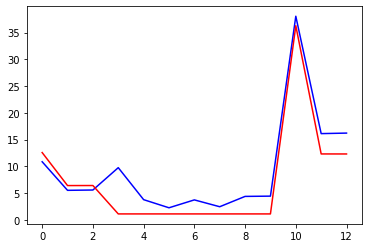

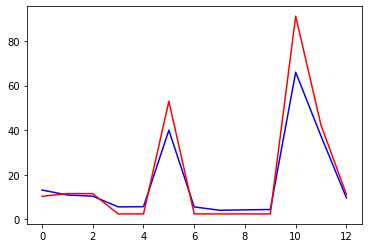

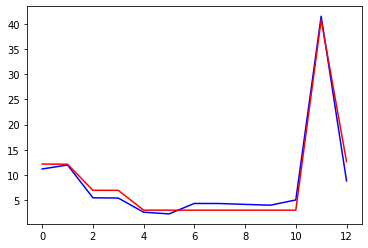

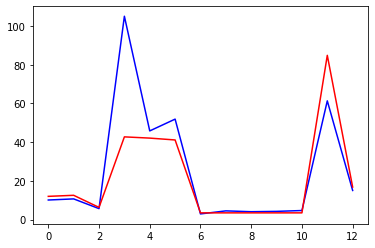

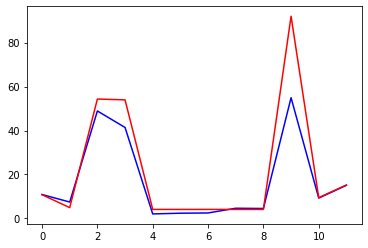

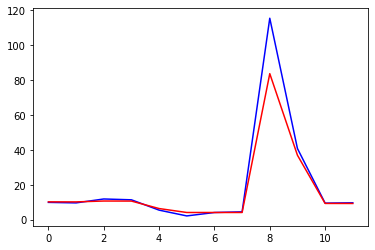

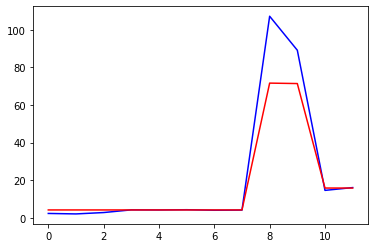

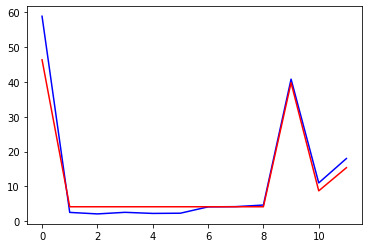

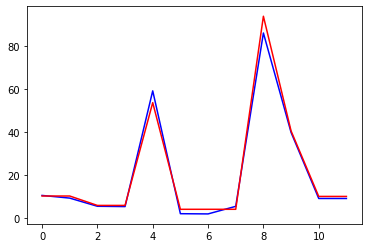

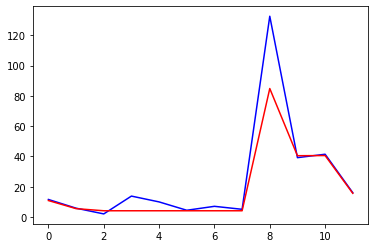

In [59]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=23, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 